In [1]:
# script that makes bar plots for exp data on WT NDD-NDD PPIs
import db_utils
import pandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

connect = db_utils.get_connection()
cursor = connect.cursor()

path = '/Users/luck/IMB/projects/AlphaFold/exp_data_analysis/'

In [3]:
query = """select f.*,i.std_cBRET_ratio cBRET_std, g.avg_replicates NL_expr,g.std_replicates NL_std, 
            h.avg_replicates mCit_expr, h.std_replicates mCit_std,i.NL_plasmid,i.mCit_plasmid
            from (select a.symbolA,a.symbolB,max(avg_cBRET_ratio) max_cBRET
                  from chopyan_db.NDD_NDD_PPI_AF_results a, luthy_data.cBRET_ratios b, 
                        luthy_data.avg_replicates c, luthy_data.avg_replicates d 
                  where ((LOCATE(a.symbolA,b.NL_plasmid)>0 and LOCATE(a.symbolB,b.mCit_plasmid)>0) or 
                        (LOCATE(a.symbolA,b.mCit_plasmid)>0 and LOCATE(a.symbolB,b.NL_plasmid)>0)) and 
                        a.tested_exp=1 and locate('_',b.NL_plasmid)<1 and locate('_',b.mCit_plasmid)<1 and 
                        locate('YTHDC1',b.NL_plasmid)<1 and locate('YTHDC1',b.mCit_plasmid)<1 and 
                        b.project_id=c.project_id and b.project_id=d.project_id and 
                        b.NL_plasmid_id=c.NL_plasmid_id and b.NL_plasmid_id=d.NL_plasmid_id and 
                        b.mCit_plasmid_id=c.mCit_plasmid_id and b.mCit_plasmid_id=d.mCit_plasmid_id and 
                        b.NL_property=c.NL_property and b.NL_property=d.NL_property and 
                        b.mCit_property=c.mCit_property and b.mCit_property=d.mCit_property and 
                        c.measurement_id='totLu01' and d.measurement_id='Fl01' and 
                        c.avg_replicates>=50000 and d.avg_replicates>=500
                  group by a.symbolA,a.symbolB) as f, 
            luthy_data.avg_replicates g, luthy_data.avg_replicates h, luthy_data.cBRET_ratios i
            where f.max_cBRET=i.avg_cBRET_ratio and i.project_id=g.project_id and i.project_id=h.project_id and 
                  ((LOCATE(f.symbolA,i.NL_plasmid)>0 and LOCATE(f.symbolB,i.mCit_plasmid)>0) or 
                  (LOCATE(f.symbolA,i.mCit_plasmid)>0 and LOCATE(f.symbolB,i.NL_plasmid)>0)) and 
                  i.NL_plasmid=g.NL_plasmid and i.NL_plasmid=h.NL_plasmid and i.mCit_plasmid=g.mCit_plasmid and 
                  i.mCit_plasmid=h.mCit_plasmid and i.NL_property=g.NL_property and i.NL_property=h.NL_property 
                  and i.mCit_property=g.mCit_property and i.mCit_property=h.mCit_property and 
                  g.measurement_id='totLu01' and h.measurement_id='Fl01' order by f.max_cBRET desc
"""
ppi_df = pandas.read_sql(query,connect)
ppi_df.head(30)

/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_53905/3461318948.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ppi_df = pandas.read_sql(query,connect)


,symbolA,symbolB,max_cBRET,cBRET_std,NL_expr,NL_std,mCit_expr,mCit_std,NL_plasmid,mCit_plasmid
0,PEX3,PEX19,1.07494,0.00570,174012.3,7850.8,3692.3,285.2,pcDNA3.1 cmyc-NL-PEX3,pcDNA3.1 PEX19-His3C-mCit
1,STX1B,VAMP2,0.37997,0.00628,181135.0,6133.6,5153.2,498.4,pcDNA3.1 cmyc-NL-STX1B,pcDNA3.1 mCit-His3C-VAMP2
2,PEX3,PEX16,0.26343,0.01931,131091.0,8412.7,1771.2,124.1,pcDNA3.1 PEX3-NL-cmyc,pcDNA3.1 PEX16-His3C-mCit
3,CSNK2A1,CSNK2B,0.18013,0.00265,468576.3,16411.0,1470.0,158.3,pcDNA3.1 CSNK2B-NL-cmyc,pcDNA3.1 mCit-His3C-CSNK2A1
4,SNRPB,GIGYF1,0.17993,0.01555,112699.3,23172.9,10748.1,1874.2,pcDNA3.1 NL-SNRPB,pcDNA3.1 mCit-His3C-GIGYF1
5,STX1B,FBXO28,0.13247,0.01015,204371.0,37910.5,10974.3,1034.5,pcDNA3.1 cmyc-NL-FBXO28,pcDNA3.1 mCit-His3C-STX1B
6,PSMC5,ESRRG,0.11113,0.01098,338514.7,19624.0,1616.4,510.6,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5
7,PNKP,TRIM37,0.10473,0.00843,73576.0,6633.2,7460.6,389.8,pcDNA3.1 cmyc-NL-TRIM37,pcDNA3.1 mCit-His3C-PNKP
8,PNKP,XRCC4,0.08567,0.00499,575032.7,126423.2,3385.9,416.1,pcDNA3.1 cmyc-NL-XRCC4,pcDNA3.1 mCit-His3C-PNKP
9,CUL3,KCTD7,0.07867,0.00317,161229.7,13383.1,2105.3,486.6,pcDNA3.1 cmyc-NL-CUL3,pcDNA3.1 KCTD7-His3C-mCit


In [4]:
ppi_df['label'] = ppi_df['NL_plasmid'].str.replace('pcDNA3.1 ','') + ' - ' + ppi_df['mCit_plasmid'].str.replace('pcDNA3.1 ','')
ppi_df['label'] = ppi_df['label'].str.replace('cmyc-','')
ppi_df['label'] = ppi_df['label'].str.replace('-cmyc','')
ppi_df['label'] = ppi_df['label'].str.replace('His3C-','')
ppi_df['label'] = ppi_df['label'].str.replace('-His3C','')
ppi_df['label'] = ppi_df['label'].str.replace('mCIT','mCit')
ppi_df.head(30)

/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_53905/522799630.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ppi_df['label'] = ppi_df['NL_plasmid'].str.replace('pcDNA3.1 ','') + ' - ' + ppi_df['mCit_plasmid'].str.replace('pcDNA3.1 ','')


,symbolA,symbolB,max_cBRET,cBRET_std,NL_expr,NL_std,mCit_expr,mCit_std,NL_plasmid,mCit_plasmid,label
0,PEX3,PEX19,1.07494,0.00570,174012.3,7850.8,3692.3,285.2,pcDNA3.1 cmyc-NL-PEX3,pcDNA3.1 PEX19-His3C-mCit,NL-PEX3 - PEX19-mCit
1,STX1B,VAMP2,0.37997,0.00628,181135.0,6133.6,5153.2,498.4,pcDNA3.1 cmyc-NL-STX1B,pcDNA3.1 mCit-His3C-VAMP2,NL-STX1B - mCit-VAMP2
2,PEX3,PEX16,0.26343,0.01931,131091.0,8412.7,1771.2,124.1,pcDNA3.1 PEX3-NL-cmyc,pcDNA3.1 PEX16-His3C-mCit,PEX3-NL - PEX16-mCit
3,CSNK2A1,CSNK2B,0.18013,0.00265,468576.3,16411.0,1470.0,158.3,pcDNA3.1 CSNK2B-NL-cmyc,pcDNA3.1 mCit-His3C-CSNK2A1,CSNK2B-NL - mCit-CSNK2A1
4,SNRPB,GIGYF1,0.17993,0.01555,112699.3,23172.9,10748.1,1874.2,pcDNA3.1 NL-SNRPB,pcDNA3.1 mCit-His3C-GIGYF1,NL-SNRPB - mCit-GIGYF1
5,STX1B,FBXO28,0.13247,0.01015,204371.0,37910.5,10974.3,1034.5,pcDNA3.1 cmyc-NL-FBXO28,pcDNA3.1 mCit-His3C-STX1B,NL-FBXO28 - mCit-STX1B
6,PSMC5,ESRRG,0.11113,0.01098,338514.7,19624.0,1616.4,510.6,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,ESRRG-NL - mCit-PSMC5
7,PNKP,TRIM37,0.10473,0.00843,73576.0,6633.2,7460.6,389.8,pcDNA3.1 cmyc-NL-TRIM37,pcDNA3.1 mCit-His3C-PNKP,NL-TRIM37 - mCit-PNKP
8,PNKP,XRCC4,0.08567,0.00499,575032.7,126423.2,3385.9,416.1,pcDNA3.1 cmyc-NL-XRCC4,pcDNA3.1 mCit-His3C-PNKP,NL-XRCC4 - mCit-PNKP
9,CUL3,KCTD7,0.07867,0.00317,161229.7,13383.1,2105.3,486.6,pcDNA3.1 cmyc-NL-CUL3,pcDNA3.1 KCTD7-His3C-mCit,NL-CUL3 - KCTD7-mCit


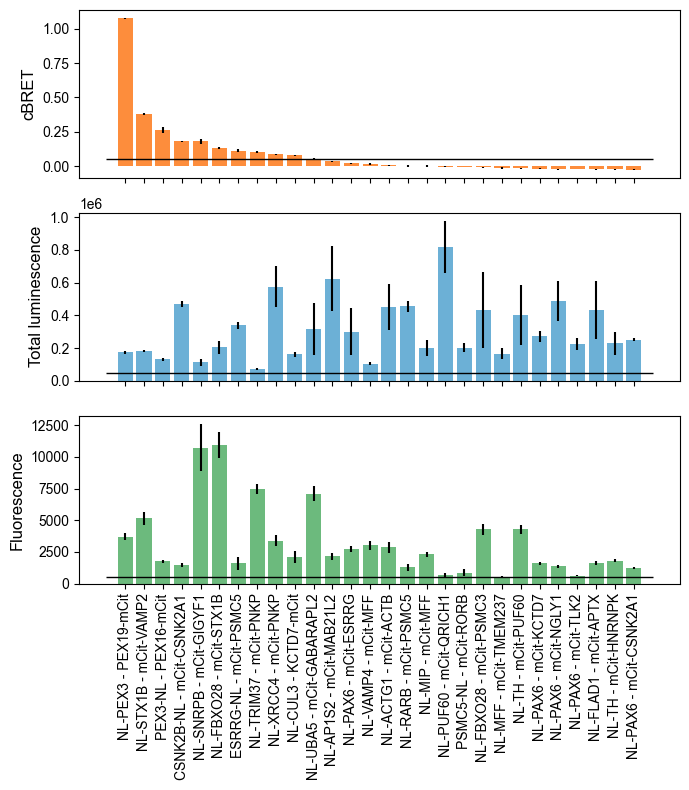

In [9]:
plt.figure(figsize=(7,8))
plt.subplot(3,1,1)
plt.bar(ppi_df.index,ppi_df.max_cBRET,yerr=ppi_df.cBRET_std,color='#FD8D3C')
plt.hlines(0.05,xmin=-1,xmax=ppi_df.shape[0],linestyle='-',color='black',linewidth=1)
plt.xticks(range(ppi_df.shape[0]),[])
plt.ylabel('cBRET',fontsize=12)

plt.subplot(3,1,2)
plt.bar(ppi_df.index,ppi_df.NL_expr,yerr=ppi_df.NL_std,color='#6CB0D6')
plt.hlines(50000,xmin=-1,xmax=ppi_df.shape[0],linestyle='-',color='black',linewidth=1)
plt.xticks(range(ppi_df.shape[0]),[])
plt.ylabel('Total luminescence',fontsize=12)

plt.subplot(3,1,3)
plt.bar(ppi_df.index,ppi_df.mCit_expr,yerr=ppi_df.mCit_std,color='#6CBA7D')
plt.hlines(500,xmin=-1,xmax=ppi_df.shape[0],linestyle='-',color='black',linewidth=1)
plt.xticks(range(ppi_df.shape[0]),ppi_df.label,rotation=90)
plt.ylabel('Fluorescence',fontsize=12)

plt.tight_layout()
plt.savefig(path+'NDD_NDD_PPI_exp_data_v2.pdf')
plt.savefig(path+'NDD_NDD_PPI_exp_data_v2.jpeg',dpi=300)
plt.show()

In [ ]:
ppi_df.to_csv('/Volumes/imb-luckgr/manuscripts/AlphaFold_paper/tables/NDD_NDD_exp_results_raw.tsv',
             sep='\t',index=None)